<a href="https://colab.research.google.com/github/RefenRefen/hello-pytorch/blob/master/4_my_cnn_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torch import nn
from torchvision import transforms
import torch.nn as nn
import time
import copy

In [2]:
print(torch.__version__)
print(torch.cuda.get_device_name())
print(torch.cuda.get_device_properties('cuda'))

1.13.0+cu116
Tesla T4
_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


#Initialization

In [4]:
batch_size = 256
num_classes = 10
num_epoch = 10

#Dataset

In [5]:
transform = torchvision.transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST('./train', train=True, transform=transform, target_transform=None, download=True)

test_dataset = torchvision.datasets.MNIST('./test', train=False, transform=transform, target_transform=None, download=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./train/MNIST/raw/train-images-idx3-ubyte.gz to ./train/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./train/MNIST/raw/train-labels-idx1-ubyte.gz to ./train/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./train/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./train/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./test/MNIST/raw/train-images-idx3-ubyte.gz to ./test/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./test/MNIST/raw/train-labels-idx1-ubyte.gz to ./test/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./test/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./test/MNIST/raw



In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

dataloaders_dict = {'train': train_loader,
                    'val': test_loader}

5


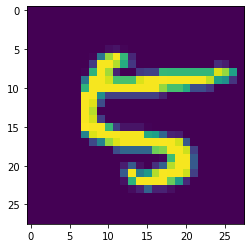

In [20]:
from torchvision.transforms.transforms import Grayscale
one_train_batch_imgs, one_train_batch_lbls = next(iter(train_loader))
# print(one_train_batch_imgs.shape)
# print(one_train_batch_lbls)
img1 = one_train_batch_imgs[0]
import matplotlib.pyplot as plt
plt.imshow(img1[0])
print(one_train_batch_lbls[0].item())

In [8]:
# for batch_number ,(image, labels) in enumerate(train_loader):
#     print(batch_number, image.shape)


#Model

In [9]:
# nn.Sequential(nn.Conv2d(1, 32, 3),
#               nn.ReLU(),
#               nn.MaxPool2d(3, 2),
#               nn.Conv2d(32, 64, 3),
#               nn.ReLU(),
#               nn.MaxPool2d(3, 2),
#               nn.Linear(64*7*7, 1024),
#               nn.Linear(1024, 10)
#               )

In [10]:
class convnet(nn.Module):
    def __init__(self, num_class):
        super(convnet, self).__init__()
        # Layer 1
        self.conv1 = nn.Sequential(nn.Conv2d(1, 32, 3),
                                    nn.ReLU(),
                                    nn.MaxPool2d(3, 1),)
        
        # # Layer 2
        # self.conv2 = nn.Sequential(nn.Conv2d(32, 32, 3),
        #                             nn.Relu(),
        #                             nn.MaxPool2d(3, 1),)
        
        # Layer 2
        self.Conv2d_2 = nn.Conv2d(32, 64, 3)
        self.relu_2 = nn.ReLU()
        self.maxpool_2 = nn.MaxPool2d(3,2)
        # Layer 3
        self.fc1 = nn.Linear(64*10*10, 1024)
        self.fc2 = nn.Linear(1024, num_class)

    def forward(self, x):
        # Layer 1
        # y = torch.nn.functional.max_pool2d(self.conv1(x))
        y = self.conv1(x)
        # y = self.conv2(y) + y
        # Layer 2
        y = self.Conv2d_2(y)
        y = self.relu_2(y)
        y = self.maxpool_2(y)
        # Layer 3
       
        y = y.view(y.size(0), -1)
        
        y = self.fc1(y)
        y = self.fc2(y)

        return y


In [11]:
model_ = convnet(num_classes).to(device)

In [12]:
model_

convnet(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv2d_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu_2): ReLU()
  (maxpool_2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6400, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

#Config

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_.parameters(), lr=0.001, momentum=0.9)


In [14]:
dataloaders_dict['train']

# Trainer

In [ ]:
for epoch in range(num_epoch):
    
    print('Epoch {}/{}'.format(epoch, num_epoch - 1))
    print('-' * 10)

    for phase in ['train', 'val']:
        
        running_loss = 0
        running_corrects = 0

        for inputs, labels in dataloaders_dict[phase]:
            
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()

            outputs = model_(inputs) # (256, 10)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1) # preds contains the index of maxmimum in 10 output for each record (256,)

            if phase == 'train':
                        loss.backward()
                        optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            
        epoch_loss = running_loss / len(dataloaders_dict[phase].dataset)
        epoch_acc = running_corrects.double() / len(dataloaders_dict[phase].dataset)

        print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))





In [28]:
len(dataloaders_dict[phase].dataset)

10000

In [22]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            # if phase == 'train':
            #     model.train()  # Set model to training mode
            # else:
            #     model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
3136*1024

3211264

In [ ]:
model_ft, hist = train_model(model_, dataloaders_dict, criterion, optimizer, num_epochs=10)

Epoch 0/9
----------
train Loss: 1.3479 Acc: 0.6707
val Loss: 0.4987 Acc: 0.8634

Epoch 1/9
----------
train Loss: 0.4258 Acc: 0.8750
val Loss: 0.3391 Acc: 0.9032

Epoch 2/9
----------
train Loss: 0.3290 Acc: 0.9039
val Loss: 0.2815 Acc: 0.9184

Epoch 3/9
----------
train Loss: 0.2699 Acc: 0.9215
val Loss: 0.2273 Acc: 0.9372

Epoch 4/9
----------
train Loss: 0.2197 Acc: 0.9367
val Loss: 0.1842 Acc: 0.9491

Epoch 5/9
----------
train Loss: 0.1834 Acc: 0.9481
val Loss: 0.1536 Acc: 0.9578

Epoch 6/9
----------
train Loss: 0.1572 Acc: 0.9562
val Loss: 0.1296 Acc: 0.9635

Epoch 7/9
----------
train Loss: 0.1389 Acc: 0.9608
val Loss: 0.1166 Acc: 0.9673

Epoch 8/9
----------
train Loss: 0.1245 Acc: 0.9641
val Loss: 0.1056 Acc: 0.9701

Epoch 9/9
----------
train Loss: 0.1149 Acc: 0.9673
val Loss: 0.0987 Acc: 0.9722

Training complete in 1m 35s
Best val Acc: 0.972200
